# Template Pipeline
Normalisation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**X -> Gaussian**  
Imputation 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Outlier Detection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Z Score**  
Imputation 2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Mean**  
Feature Selection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Implicit to model**  
Model&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Lasso Regression**


## Imports

In [ ]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, BayesianRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Custom
import sys,os
sys.path.append('/home/jovyan/work/AML/Task_1/Solution') # I would like a cleaner solution but works for now
import Components.Imputation as Imputation
import Components.Outlier_Detection_1D as Outlier_Detection_1D
import Components.Outlier_Detection_ND as Outlier_Detection_ND
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.data_observations as data_observations

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Imputation)
importlib.reload(Outlier_Detection_1D)
importlib.reload(Outlier_Detection_ND)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(data_observations)

<module 'Components.data_observations' from '/home/jovyan/work/AML/Task_1/Solution/Components/data_observations.py'>

## Data Cleaning

In [ ]:
X, y = data_fetching.get_train_data()

X = Imputation.median(X)
X = Normalisation.gaussian(X)
X = Outlier_Detection_1D.z_score(X)
X = Imputation.mean(X)
# X = Outlier_Detection_ND.z_score(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

## Model Training

### Simple

In [ ]:
for a in np.linspace(0.3,0.5,10):
    print('\nAlpha: ', a)
    lasso = Lasso(normalize=False, max_iter=1000, alpha=a) #.fit(x_train, y_train)
    scores = cross_val_score(lasso, x_train, y_train, cv=3, scoring='r2')
    print(scores)
    # print('Train Score:')
    # y_pred_train = lasso.predict(x_train)
    # train_score = r2_score(y_train, y_pred_train)
    # print(train_score)

    # print('Test Score')
    # y_pred_test = lasso.predict(x_test)
    # test_score = r2_score(y_test, y_pred_test)
    # print(test_score)


Alpha:  0.3
[0.52501273 0.47296104 0.39652844]

Alpha:  0.3222222222222222
[0.52852522 0.47212649 0.39722649]

Alpha:  0.34444444444444444
[0.53141157 0.47149847 0.39769805]

Alpha:  0.36666666666666664
[0.53312332 0.47090158 0.39826174]

Alpha:  0.3888888888888889
[0.53362588 0.47034924 0.39812674]

Alpha:  0.4111111111111111
[0.53265965 0.4704676  0.3980234 ]

Alpha:  0.43333333333333335
[0.53183021 0.470913   0.39766435]

Alpha:  0.45555555555555555
[0.53088473 0.47130339 0.39669708]

Alpha:  0.47777777777777775
[0.53002197 0.47121217 0.39584712]

Alpha:  0.5
[0.52897922 0.47090104 0.39498213]


In [ ]:
# lasso = Lasso(normalize=False, max_iter=1000, alpha=0.4).fit(x_train, y_train)
lasso = LassoCV(cv=5, random_state=0).fit(x_train, y_train)

print('Train Score:')
y_pred_train = lasso.predict(x_train)
train_score = r2_score(y_train, y_pred_train)
print(train_score)

print('Test Score')
y_pred_test = lasso.predict(x_test)
test_score = r2_score(y_test, y_pred_test)
print(test_score)

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.375901680748939, tolerance: 8.20865
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.88651937537361, tolerance: 8.20865
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.71628636857531, tolerance: 8.20865
  positive)

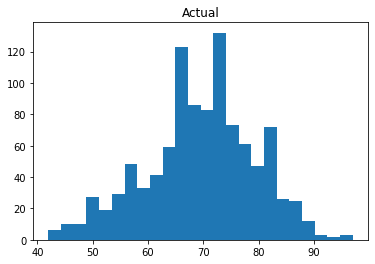

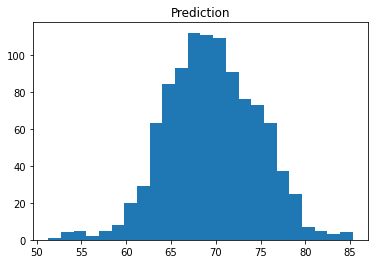

In [ ]:
plt.hist(y_train.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_train, bins='auto')
plt.title('Prediction')
plt.show()

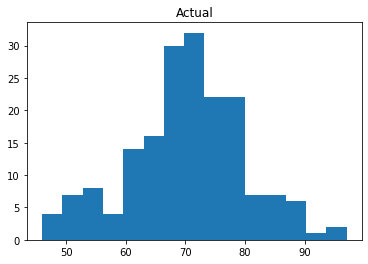

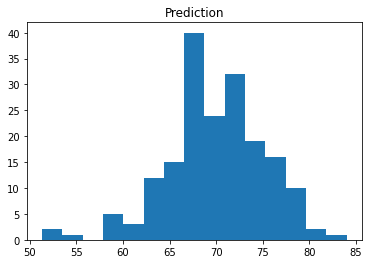

In [ ]:
plt.hist(y_test.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_test, bins='auto')
plt.title('Prediction')
plt.show()

### With Cross Validation

In [ ]:
for a in np.linspace(0,0.5,10):
    print('\n\nAlpha = ', a)

    lasso = Lasso(normalize=False, max_iter=1000, alpha=a).fit(x_train, y_train)

    # cross_val_score(lasso, x_train, y_train, cv=5, scoring='r2')

/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.880446166451293, tolerance: 8.20865
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.298805970880494, tolerance: 8.03891832524272
  positive)
[0.45733544 0.49884634 0.4972357  0.36971324 0.32431551]


## Final Prediction

In [ ]:
lasso_final = Lasso(normalize=False, max_iter=1000, alpha=15000).fit(x_train, y_train)
x_test = data_fetching.get_test_data()
x_test = Imputation.mean(x_test)
# Note: They said no outliers were introduced in x_test so no need to perform outlier detection
y_pred = lasso_final.predict(x_test)
plt.hist(y_pred)

y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])
y_pred_pd.to_csv('../../Predictions/template.csv', index_label='Id')